# Commonalities among Fans of the Hitchhiker's Guide to the Galaxy

In [1]:
from random import randint
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chisquare, chi2_contingency
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import seaborn as sns
from itertools import combinations
from kmodes.kprototypes import KPrototypes
from deepthought import to_float, prop_sem, test_statistic, get_wisdom, p_ztest

I have preprocessed the data into seperate sheets ready to explore which are imported here. Nothing needs to be changed.

In [2]:
survey_data = pd.read_csv("responses cleaned final.csv", index_col=0)
influences = pd.read_csv("cleaned_influences.csv", index_col=0)
aspects = pd.read_csv("aspectfinals.csv", index_col=0)
obtained = pd.read_csv("obtained.csv", index_col=0)
survey_data.columns = ["current age", "country", "gender", "HHGG age", "obtained", "other obtained", "influence", "aspect"]
survey_data = survey_data.drop(["obtained", "other obtained"], axis=1)
#work on a copy just to be safe
sd = survey_data.copy()
sd["current age"] = sd["current age"].apply(to_float)
sd["HHGG age"] = sd["HHGG age"].apply(to_float)
sd["year read"] = 2019 - (sd["current age"] - sd["HHGG age"])

## 2.3 First reading age

Let's have a look at our population's numerical data. HHGG age stands for the age respondents were when they first read The Hitchhiker's Guide to the Galaxy. 

_see Computations/Descriptive Stats at  https://pandas.pydata.org/pandas-docs/stable/reference/frame.html for more neat built-in functions to describe our data_

In [3]:
#to get an overview
sd.describe()

,current age,HHGG age,year read
count,595.000000,592.000000,591.000000
mean,29.515126,16.149493,2005.688663
std,9.828527,4.525080,9.997603
min,12.000000,5.000000,1981.000000
25%,22.000000,13.000000,1999.000000
50%,28.000000,15.000000,2007.000000
75%,36.000000,18.000000,2015.000000
max,78.000000,40.000000,2019.000000


A closer look at the age distribution

In [4]:
#transpose for compactness remove the .T to see the full table
pd.DataFrame(sd["current age"].value_counts()).T

,24.0,18.0,22.0,28.0,20.0,33.0,27.0,32.0,23.0,29.0,...,44.0,55.0,46.0,52.0,58.0,60.0,12.0,27.5,61.0,78.0
current age,29,27,26,26,25,24,24,24,24,21,...,4,2,2,2,1,1,1,1,1,1


In [5]:
#transpose for compactness remove the .T to see the full table
pd.DataFrame(sd["HHGG age"].value_counts()).T

,16.0,14.0,12.0,13.0,15.0,17.0,18.0,20.0,19.0,11.0,...,30.0,18.5,37.0,11.5,5.0,27.5,33.0,20.5,35.0,40.0
HHGG age,74,74,59,57,49,38,28,27,26,21,...,2,2,1,1,1,1,1,1,1,1


In [6]:
#transpose for compactness remove the .T to see the full table
pd.DataFrame(sd["year read"].value_counts()).T

,2017.0,2018.0,2016.0,2009.0,2015.0,2006.0,2014.0,2007.0,2005.0,2011.0,...,2005.5,2014.5,1982.5,1991.5,2002.5,1984.5,2011.5,1985.5,2010.5,2018.5
year read,50,32,29,28,28,25,24,23,22,20,...,1,1,1,1,1,1,1,1,1,1


Have a closer look by changing the minimum number of participants for in each age or year, alternatively use the tail and head arguments.

In [7]:
min_value = 25

In [8]:
pd.DataFrame(sd["HHGG age"].value_counts())[sd["HHGG age"].value_counts() > min_value]

,HHGG age
16.0,74
14.0,74
12.0,59
13.0,57
15.0,49
17.0,38
18.0,28
20.0,27
19.0,26


In [9]:
pd.DataFrame(sd["year read"].value_counts())[sd["year read"].value_counts() > min_value]

,year read
2017.0,50
2018.0,32
2016.0,29
2009.0,28
2015.0,28


In [10]:
pd.DataFrame(sd["current age"].value_counts())[sd["current age"].value_counts() > min_value]

,current age
24.0,29
18.0,27
22.0,26
28.0,26


In [11]:
# remove the "#" to unlock this cell, it will display the top 5 values for "HHGG age"
#pd.DataFrame(sd["HHGG age"].value_counts()).head(5)

In [12]:
# remove the "#" to unlock this cell, it will display the lowest 5 values for "HHGG age"
#pd.DataFrame(sd["HHGG age"].value_counts()).tail(5)

The following cells will display visualizations to help us understand our data better.
I chose seaborns' distplot as I feel it represents the numerical distribution best.
You can insert a cell and try out alternative plots with functions from seaborn (recommended) which uses matplotlib's plotting capabilities.
https://seaborn.pydata.org/tutorial/distributions.html


Or you can use matplotlib's functions (https://matplotlib.org/tutorials/introductory/pyplot.html) directly via sd.plot("function name") https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html.

In [13]:
#setting the style for the following plots (find more options at https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11,8)})

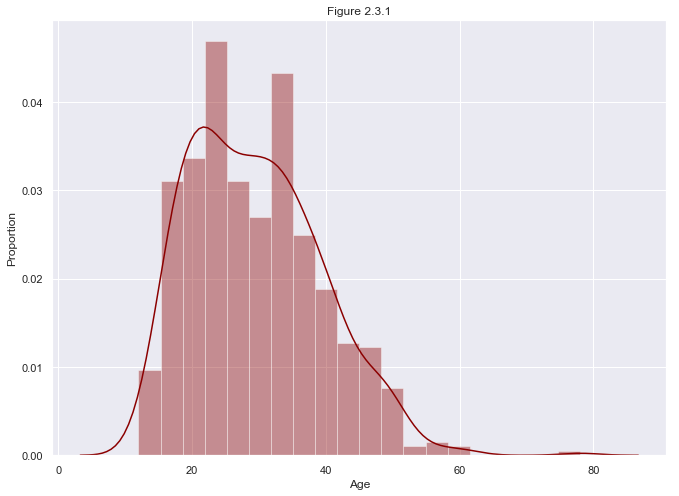

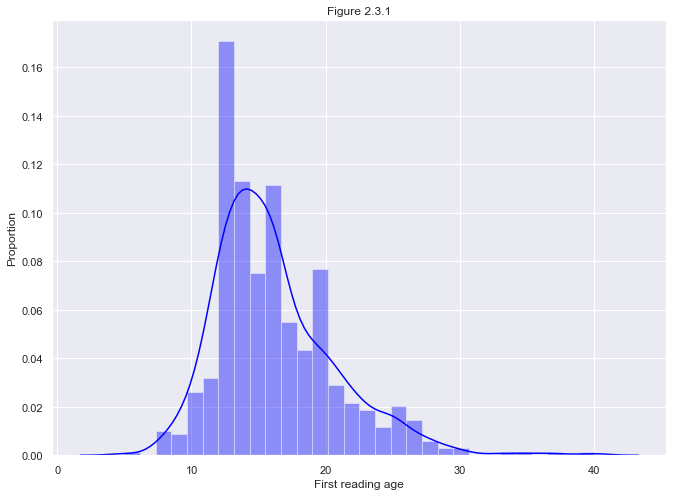

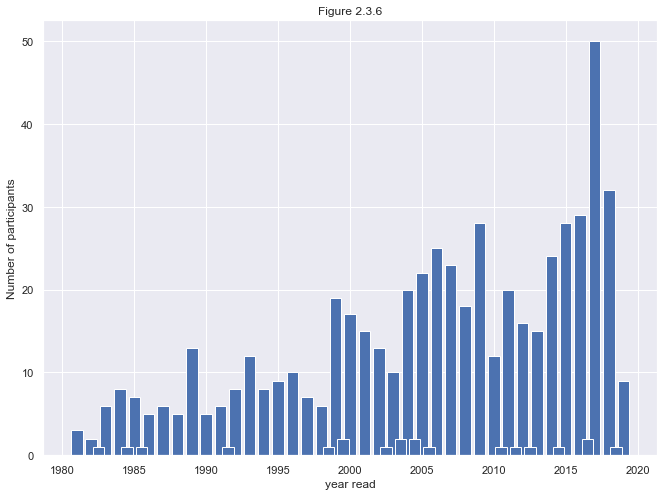

In [14]:
fig = sns.distplot(sd["current age"].dropna(), color='darkred')
fig.set(xlabel="Age", ylabel="Proportion", title="Figure 2.3.1")
plt.show()
fig = sns.distplot(sd["HHGG age"].dropna(), color='blue')
fig.set(xlabel="First reading age", ylabel="Proportion", title="Figure 2.3.1")
plt.show()
year_read = pd.DataFrame(sd["year read"].value_counts())
year_read["year"] = year_read.index.to_list()
plt.bar(year_read["year"], year_read["year read"])
plt.xlabel("year read")
plt.title("Figure 2.3.6")
plt.ylabel("Number of participants")
plt.show()

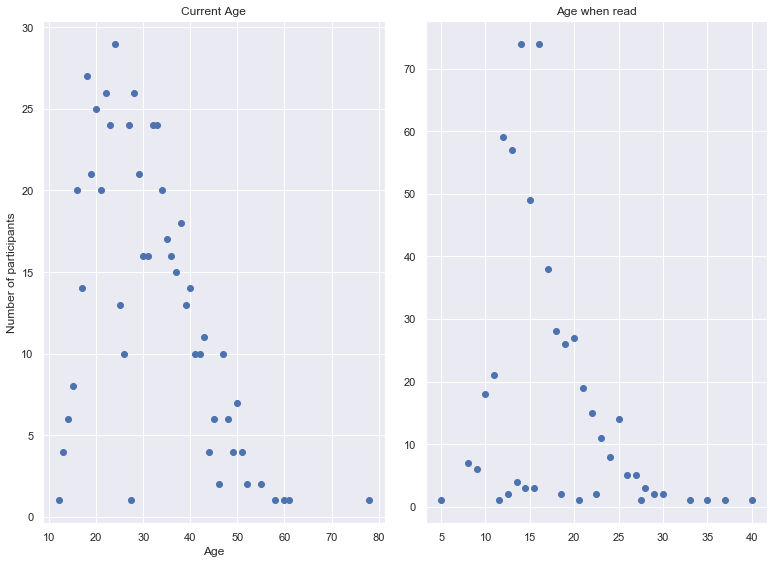

In [15]:
fig = plt.figure()
plot1 = fig.add_subplot(1,2,1)
plot2 = fig.add_subplot(1,2,2)
plot1.set_title("Current Age")
plot2.set_title("Age when read")
plot1.plot(sd["current age"].value_counts(), 'o')
plot2.plot(sd["HHGG age"].value_counts(), 'o')
plot1.set_xlabel('Age')
plot1.set_ylabel("Number of participants")
plot2
fig.tight_layout()

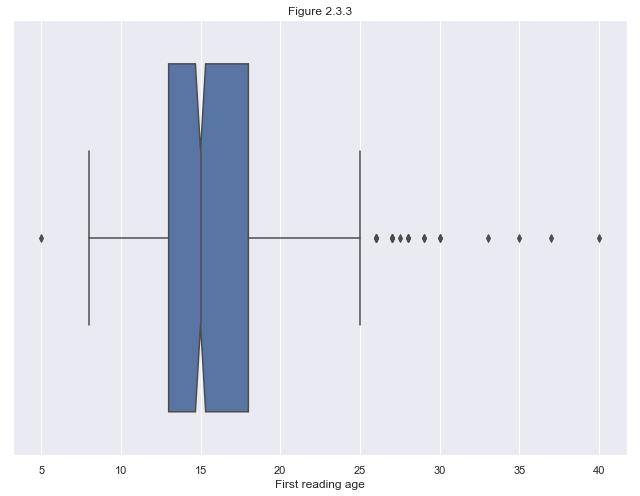

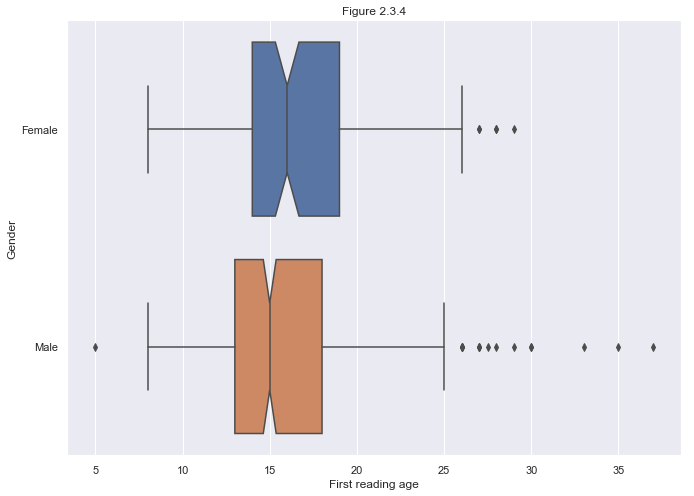

In [16]:
fig = sns.boxplot(x="HHGG age", data=sd, notch=True, orient='h')
fig.set(xlabel="First reading age", title="Figure 2.3.3")
plt.show()
sns.set_style("darkgrid")
fig = sns.boxplot(x="HHGG age", y="gender", data=sd, notch=True)
fig.set(xlabel="First reading age", ylabel="Gender", title="Figure 2.3.4")
plt.show()

## 2.4 How Fans obtained the book
One of the paper's primary goals was to find out if we were more likely to receive this book as a gift. 
Let us, therefore, explore how fans obtained the book.

We start by creating a new data frame that will provide us with some overview of the distribution and then visualizing it.

In [17]:
#for lack of a better name let's call our new df 'counts', feel free to change this
counts = pd.DataFrame(obtained.obtained.value_counts())
counts.columns = ["count"]
counts["Percentage"] = round(((counts["count"] / counts["count"].sum()) * 100), 2)
proportions = counts["Percentage"] / 100
counts["Margin of Error in %"] = round((prop_sem(proportions, 591)*1.96)*100,2)
counts["way"] = counts.index

In [18]:
counts
#this is also Table 2.4.1 in the paper

,count,Percentage,Margin of Error in %,way
Bought it for myself,267,45.18,4.01,Bought it for myself
Given to me as a gift,144,24.37,3.46,Given to me as a gift
Library,71,12.01,2.62,Library
Borrowed from Family,56,9.48,2.36,Borrowed from Family
Borrowed from friends,26,4.40,1.65,Borrowed from friends
Online Platform,6,1.02,0.81,Online Platform
Borrowed from Friends or Family,6,1.02,0.81,Borrowed from Friends or Family
Pirated,5,0.85,0.74,Pirated
Doesn't Remember,3,0.51,0.57,Doesn't Remember
No Answer,2,0.34,0.47,No Answer


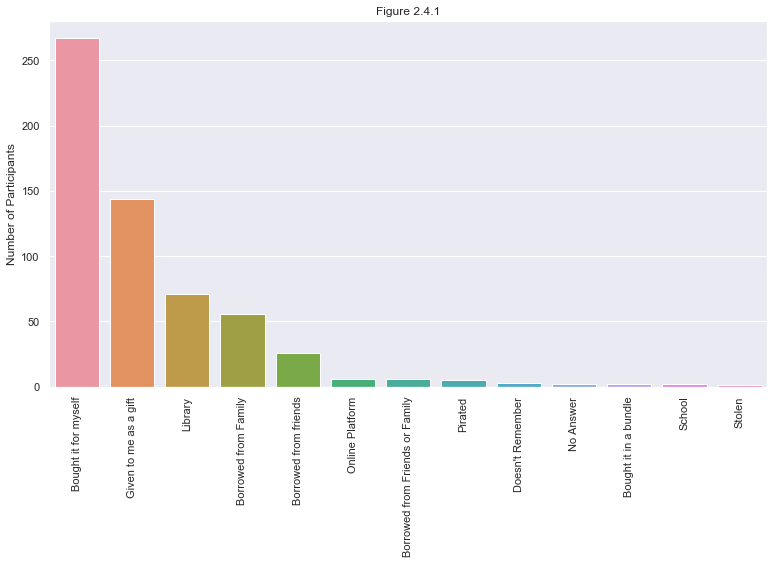

In [19]:
plot = sns.barplot(x="way", y="count", data=counts)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_ylabel("Number of Participants")
plot.set_xlabel("")
plt.title("Figure 2.4.1")
plt.tight_layout()
plt.show()

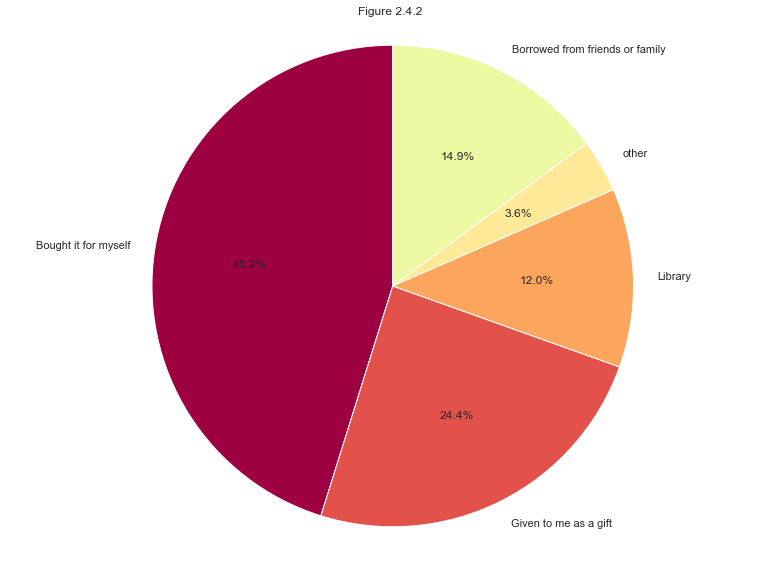

In [20]:
#we group the categories with fewer than 10 counts to 'other' so we can display it in a nice pie chart
piecount = counts["count"][counts["count"] >=70]
#we have to correct for the double count of borrowed from friends or family see counts* above
piecount.loc["other"] = counts["count"][counts["count"] <10].sum() - 6
piecount.loc["Borrowed from friends or family"] = 88
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
labels = piecount.index.to_list()
plt.pie(piecount, autopct='%1.1f%%', labels=labels, colors=colors, startangle=90)
plt.tight_layout()
plt.axis('equal')
plt.title("Figure 2.4.2")
plt.show()

The following creates a data frame with which we'll be able to visualize differences between female and male fans.  The reason this is so messy is lack of foresight on my part during the assignment of the tags.

In [21]:
men = obtained["obtained"][survey_data["gender"] == "Male"].value_counts()
men.loc["Borrowed"] = men.loc["Borrowed from Family"] + men.loc["Borrowed from friends"] + \
men.loc["Borrowed from Friends or Family"]
men = round((men / len(obtained[survey_data["gender"] == "Male"]))*100, 2)
women = obtained["obtained"][survey_data["gender"] == "Female"].value_counts()
women["Borrowed"] = women.loc["Borrowed from Family"] + women.loc["Borrowed from friends"] + \
women.loc["Borrowed from Friends or Family"]
women = round((women / len(obtained[survey_data["gender"] == "Female"]))*100, 2)
men = pd.DataFrame(men)
men["Gender"] = "Men"
women = pd.DataFrame(women)
women["Gender"] = "Women"
mw = pd.concat([men, women])
mw["Value"] = mw.index
mw[mw["obtained"] > 11]

,obtained,Gender,Value
Bought it for myself,44.25,Men,Bought it for myself
Given to me as a gift,25.44,Men,Given to me as a gift
Library,12.17,Men,Library
Borrowed,13.94,Men,Borrowed
Bought it for myself,47.79,Women,Bought it for myself
Given to me as a gift,20.59,Women,Given to me as a gift
Library,11.03,Women,Library
Borrowed,17.65,Women,Borrowed


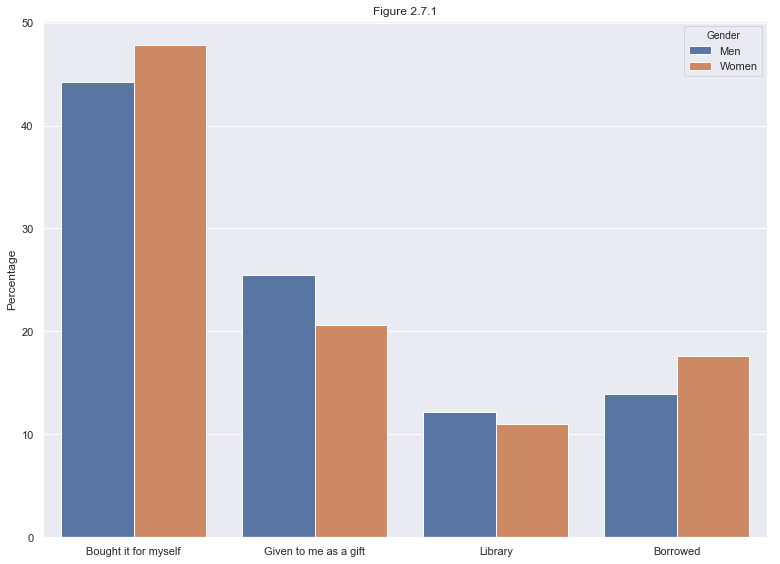

In [85]:
plot = sns.barplot(x="Value", y="obtained", hue="Gender", data=mw[mw["obtained"] > 11])
plot.set_ylabel("Percentage")
plot.set_xlabel("")
plt.title("Figure 2.7.1")
plt.tight_layout()
plt.show()

Are there connections between the ages when fans first read the book and the way they obtained it?

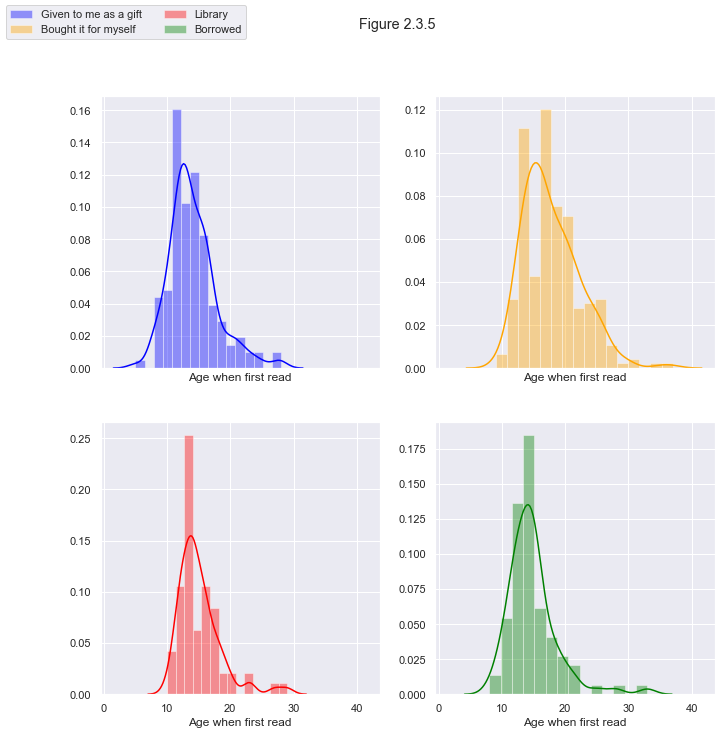

In [23]:
groupedbyage = obtained.groupby("obtained")
f, axes = plt.subplots(2, 2, figsize=(11, 11), sharex=True)
sns.distplot(obtained["HHGG age"][obtained.obtained=="Given to me as a gift"].dropna(),
             label="Given to me as a gift", ax=axes[0,0], color='blue', axlabel="Age when first read")
sns.distplot(obtained["HHGG age"][obtained.obtained=="Bought it for myself"].dropna(),
             label="Bought it for myself", ax=axes[0,1], color='orange', axlabel="Age when first read")
sns.distplot(obtained["HHGG age"][obtained.obtained=="Library"].dropna(),
             label="Library", ax=axes[1,0], color='red', axlabel="Age when first read")
sns.distplot(obtained["HHGG age"][(obtained.obtained=="Borrowed from Family") | (obtained.obtained=="Borrowed from friends")].dropna(),
             label="Borrowed", ax=axes[1,1], color='green', axlabel="Age when first read")
f.legend(loc='upper left', ncol=2)
f.suptitle("Figure 2.3.5")
plt.show()

Let us now compare these proportions with the average American reader.
48 % of Americans have bought the last book they read, 24% borrowed it from friends or family, 14% got it at the library, and 13% received it by other means, such as a gift. (The Rise of E-Reading, PEW Research (2012), https://www.pewinternet.org/2012/04/04/part-5-where-and-how-readers-get-their-books/, [April 5, 2019])

To get meaningful results, we will compare our whole population and also only the American participants of our survey.

We begin by conducting a Chi-Squared Test to find out how well our observed frequencies fit the general population.

In [24]:
usobtained = obtained[sd["country"] == "United States"]
uscounts = pd.DataFrame(usobtained.obtained.value_counts())
uscounts["Percentage"] = round(((uscounts["obtained"] / uscounts["obtained"].sum())*100), 2)
uscounts["way"] = uscounts.index.tolist()
uscounts["Proportion"] = uscounts["obtained"] / uscounts["obtained"].sum()

In [25]:
#for us participants
us_borrowed = uscounts.loc["Borrowed from Family"].obtained + uscounts.loc["Borrowed from friends"].obtained + \
uscounts.loc["Borrowed from Friends or Family"].obtained
observed = [uscounts.loc["Bought it for myself"].obtained, us_borrowed, uscounts.loc["Library"].obtained]
expected = [uscounts.obtained.sum()*0.48,uscounts.obtained.sum()*0.24,uscounts.obtained.sum()*0.14]
tstat, pval = chisquare(observed, expected)
print("A Goodness of Fit Test \
with our US-Participants results in a test statistic of: {} and a P-Value of: {}".format(tstat, pval))

A Goodness of Fit Test with our US-Participants results in a test statistic of: 16.609657794676803 and a P-Value of: 0.0002473196576934059


In [26]:
#for all participants
all_borrowed = counts.loc["Borrowed from Family"]["count"] + counts.loc["Borrowed from friends"]["count"] + \
counts.loc["Borrowed from Friends or Family"]["count"]
observed = [counts.loc["Bought it for myself"]["count"], all_borrowed, counts.loc["Library"]["count"]]
expected = [counts["count"].sum()*0.48, counts["count"].sum()*0.24,counts["count"].sum()*0.14]
tstat, pval = chisquare(observed, expected)
print("A Goodness of Fit Test \
with our whole population results in a test statistic of: {} and a P-Value of: {}".format(tstat, pval))

A Goodness of Fit Test with our whole population results in a test statistic of: 23.083281766175173 and a P-Value of: 9.716929513326031e-06


Both P-Values of our Chi-squared Test results in P-Values of less than 0.0001 and can, therefore, be considered significant by any convention.
These differences are unlikely to be the result of chance.

Next, let us find out which proportions caused our population to differ.
Since the "bought it" and "library" groups are within the confidence intervals, we will only test the proportions of fans who received the book as a gift and who borrowed it for significance.
In both cases, our Null-Hypothesis is, that there is no difference between our observed frequencies and the mean frequencies (proportions). 
Our Alternative Hypothesis is that there is a significant difference between the proportions of our population and the average proportions. 

In [27]:
usborr = uscounts.loc["Borrowed from Family"]["Proportion"] \
+ uscounts.loc["Borrowed from friends"]["Proportion"] + \
uscounts.loc["Borrowed from Friends or Family"]["Proportion"]

Is The Hitchhiker's Guide to the Galaxy less likely to have been borrowed?

_please refer to deepthought.py to see how i implemented the proportion test for significance and verify my calculations_

In [28]:
#all participants z-test for borrowed proportion
p_ztest(0.15, 0.24, 591)

'P-Value: 7.518054808707473e-08, Z = -5.122993830708142'

In [29]:
#us participants z-test for borrowed proportion
p_ztest(usborr, 0.24, 263)

'P-Value: 1.7545710884869906e-06, Z = -4.493133236517919'

P-Values of less than 0.000001 suggest so! We reject the Null in the first test and conclude that The Hitchhiker's Guide to the Galaxy is less likely to have been borrowed.

But, is the book then, more likely to have been received as a gift than other books?

In [30]:
# all participants z-test for gift proportion
p_ztest(counts["Percentage"].loc["Given to me as a gift"]/100, 0.13, 591)

'P-Value: 5.1270021783733515e-17, Z = 8.219074228105544'

In [31]:
# us participants z-test for gift proportion
p_ztest(uscounts["Proportion"].loc["Given to me as a gift"], 0.13, 263)

'P-Value: 8.532714384101841e-08, Z = 5.099079840838477'

# 2.5 How the book has influenced respondents

I was pleasantly surprised at the depth and variety of answers I received for the open-ended questions. 
The effort put forth by so many respondents made to give genuinely insightful answers moved me. I have learned so much more from these answers about my favorite book than any analysis I read. I did not expect anyone to think and give me more than 2,3-word answers. I was, I am humbled, and if it wasn't for the onions that I keep about my desk, one could have assumed I teared up.


The aptly named function get_wisdom(), which you can call at any time, or refresh at your pleasure in the cell below shares answers from the last two questions at random. 
Each refresh provides answers from two different respondents.


In [43]:
#engagin infinite probability drive...
#threadmills engaged, quering the earth...
get_wisdom()

Influence the book had on respondent 562: Taught me about  - Sarcasm.  - Human emotions and how people try to hide their insecurities / lack of knowledge. - How looking at authoritarian figures from an external viewpoint shows that people aren't being deliberately evil / sadistic, they are just being indifferent (which in itself is sad). As an example that would be both the vogons and Beeblebrox. With Trump being president, is this caricature really far fetched?  - being lucky is often about trying to be in the right place, so your life may be lucky - not entirely due to chance, but because you figuratively took your towel, your don't panic attitude and tried to do something.    

 
Aspect respondent 276 found the most interesting: Don't Panic.


In [38]:
vc = influences["influence1"].value_counts()
vc = vc.add(influences["influence2"].value_counts(), fill_value = 0)
vc = vc.add(influences["influence3"].value_counts(), fill_value = 0)
vc = vc.add(influences["influence4"].value_counts(), fill_value = 0)

I apologize for the following mess once more — lack of foresight when tagging, led me here as well.

In [33]:
values = vc.index.to_list()
cleaned = pd.Series(index = vc.index)
cleaned = cleaned.fillna(0)
for tag in values:  
    for p in range(len(influences)):
        tagged = False
        for col in range(len(influences.columns.to_list())):
            if tagged == False:
                if influences.iloc[p, col] == tag:
                    cleaned.loc[tag] += 1 
                    tagged = True

cleaned = cleaned.sort_values(ascending=False)
vcdf = pd.DataFrame(cleaned[cleaned >= 2], columns=["count"])
vcdf["Influence"] = vcdf.index.to_list()

In [34]:
#Table 2.5.1
vcdf

,count,Influence
changed perspective,145.0,changed perspective
enriched life through comedy,112.0,enriched life through comedy
Inspired new interests,102.0,Inspired new interests
References,81.0,References
appreciate the comedy or absurdity of life,75.0,appreciate the comedy or absurdity of life
influence on personality,71.0,influence on personality
Don't panic,58.0,Don't panic
Unsure or not much,53.0,Unsure or not much
enriched life or general positive influence,44.0,enriched life or general positive influence
don't take anything to seriously,39.0,don't take anything to seriously


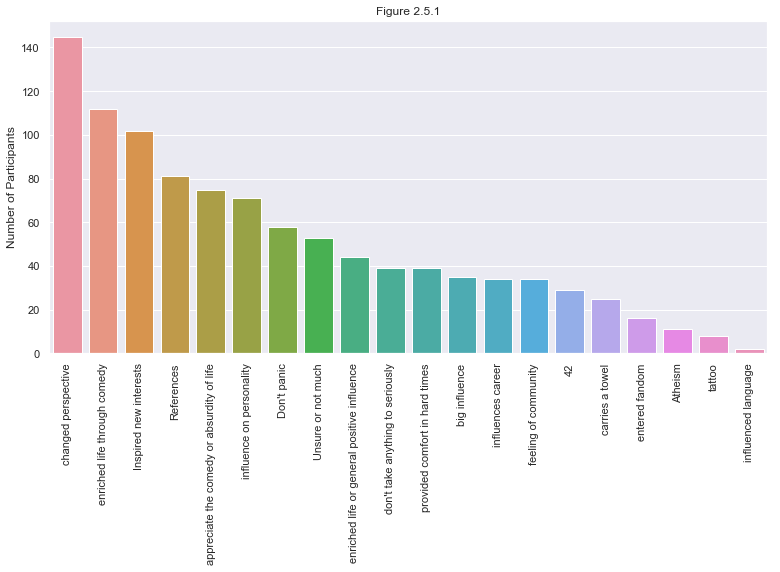

In [44]:
plot = sns.barplot(x="Influence", y="count", data=vcdf)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_ylabel("Number of Participants")
plot.set_xlabel("")
plt.tight_layout()
plt.title("Figure 2.5.1")
plt.show()

# 2.6 Aspects of the book most important to participants

In [63]:
aspects_all = aspects.tag1.value_counts() 
aspects_all = aspects_all.add(aspects.tag2.value_counts(), fill_value=0)
aspects_all = aspects_all.add(aspects.tag3.value_counts(), fill_value=0)
aspects_all = aspects_all.add(aspects.tag4.value_counts(), fill_value=0)

In [64]:
aspects_all =pd.DataFrame(aspects_all.sort_values(ascending=False), columns=["Count"])

In [69]:
aspects_all["Percentage"] = round((aspects_all["Count"].sort_values(ascending=False) / len(sd))*100, 2)
aspects_all["Aspect"] = aspects_all.index

Respondents answered this question much more succinctly. Many (55) used only a single word: Humor.
That this was easy to answer clearly for many is meaningful too, to quote a random but eloquent Hitchhiker: "It shows where fans' affections really lay."

In [70]:
#Table 2.6.1
aspects_all

,Count,Percentage,Aspect
Humor,209.0,35.07,Humor
writing style,130.0,21.81,writing style
absurdity,93.0,15.60,absurdity
philosophical meaning in the book,71.0,11.91,philosophical meaning in the book
new persepectives,64.0,10.74,new persepectives
"insignificance, powerlessness and uncertainty",56.0,9.40,"insignificance, powerlessness and uncertainty"
Characters,42.0,7.05,Characters
relevance to real life,40.0,6.71,relevance to real life
Don't panic,36.0,6.04,Don't panic
sarcasm,30.0,5.03,sarcasm


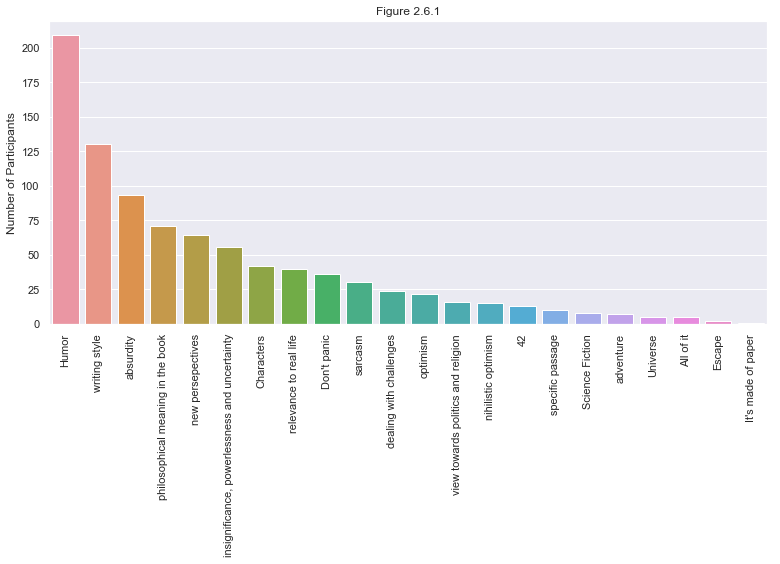

In [73]:
plot = sns.barplot(x="Aspect", y="Count", data=aspects_all)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_ylabel("Number of Participants")
plot.set_xlabel("")
plot.set_title("Figure 2.6.1")
plt.tight_layout()

# 2.7 Difference between Male and Female Fans

Spoiler: besides the obvious, there really isn't any differences between Men and Women.
Male and female fans were likely to have read the book at the same age and obtained it through the same means. They shared the same influences and view of the most important aspects of the book. 

Let us start by examining the proportions of how men and women obtained the book, though they don't match exactly, the results are within the confidence intervals.

In [80]:
women.columns = ["Percentage", "Gender"]
women

,Percentage,Gender
Bought it for myself,47.79,Women
Given to me as a gift,20.59,Women
Library,11.03,Women
Borrowed from Family,10.29,Women
Borrowed from friends,6.62,Women
Doesn't Remember,0.74,Women
Borrowed from Friends or Family,0.74,Women
Bought it in a bundle,0.74,Women
Online Platform,0.74,Women
School,0.74,Women


In [81]:
men.columns = ["Percentage", "Gender"]
men

,Percentage,Gender
Bought it for myself,44.25,Men
Given to me as a gift,25.44,Men
Library,12.17,Men
Borrowed from Family,9.07,Men
Borrowed from friends,3.76,Men
Online Platform,1.11,Men
Borrowed from Friends or Family,1.11,Men
Pirated,0.88,Men
Doesn't Remember,0.44,Men
No Answer,0.22,Men


Let us test to be sure.
The following formula (which I got from the book Staistics for dummies by Deborah Rumsey) is used:

\begin{equation*}
   z= \frac{\widehat{p_{1} }  - \widehat{p_{2} }}{ \sqrt{ \widehat{p}(1- \widehat{p})( \frac{1}{ n_{1} } +  \frac{1}{ n_{2} })} } 
\end{equation*}

In [91]:
#creates a table proportions to be used in the formula which calculates the z-statistic
obtprops = obtained.obtained.value_counts() / len(sd)

0.24161073825503357

In [100]:
#Formula used from Rumsey, 2011 Statistics for Dummies, Comparing two population proportions
pmen = obtained["obtained"][sd["gender"] == "Male"].value_counts() / len(obtained[sd["gender"] == "Male"])
pwomen = obtained["obtained"][sd["gender"] == "Female"].value_counts() / len(obtained[sd["gender"] == "Female"])
diff = pmen.loc["Given to me as a gift"] - pwomen.loc["Given to me as a gift"]
popp = obtprops.loc["Given to me as a gift"]*(1-obtprops.loc["Given to me as a gift"])
sinvs = (1/sd.gender.value_counts()["Male"]) + (1/sd.gender.value_counts()["Female"])
sderror = np.sqrt( popp*sinvs )
statistic = diff / sderror
print("The test statistic: {}, the p-value: {}".format(statistic, st.norm.sf(abs(statistic) / 2)))

The test statistic: 1.159490728951004, the p-value: 0.28104317322991745


In [101]:
pmen = obtained["obtained"][sd["gender"] == "Male"].value_counts() / len(obtained[sd["gender"] == "Male"])
pwomen = obtained["obtained"][sd["gender"] == "Female"].value_counts() / len(obtained[sd["gender"] == "Female"])
diff = pmen.loc["Bought it for myself"] - pwomen.loc["Bought it for myself"]
popp = obtprops.loc["Bought it for myself"]*(1-obtprops.loc["Bought it for myself"])
sinvs = (1/sd.gender.value_counts()["Male"]) + (1/sd.gender.value_counts()["Female"])
sderror = np.sqrt( popp*sinvs )
statistic = diff / sderror
print("The test statistic: {}, the p-value: {}".format(statistic, st.norm.sf(abs(statistic) / 2)))

The test statistic: -0.7291583257409221, the p-value: 0.357712785699862


We discover that both statistics are firmly within the interval of chance. Feel free to try and test for other proportions, just change "Bought it for myself" above to "Library" or "Borrowed from friends".

In [ ]:
plot = sns.barplot(x="Value", y="obtained", hue="Gender", data=mw[mw["obtained"] > 11])
plot.set_ylabel("Percentage")
plot.set_xlabel("")
plt.title("Figure 2.7.1")
plt.tight_layout()
plt.show()

How about Age?

In [88]:
#Female Respondents overview
sd[sd["gender"] == "Female"].describe()

,current age,HHGG age,year read
count,136.000000,134.000000,134.000000
mean,29.110294,16.727612,2006.951493
std,8.621827,4.599614,8.597707
min,14.000000,8.000000,1982.500000
25%,23.000000,14.000000,2002.000000
50%,27.000000,16.000000,2008.500000
75%,35.000000,19.000000,2014.000000
max,61.000000,29.000000,2019.000000


In [89]:
#Male Respondents overview
sd[sd["gender"] == "Male"].describe()

,current age,HHGG age,year read
count,451.000000,450.000000,449.000000
mean,29.609756,15.946667,2005.309577
std,9.927662,4.379981,10.320637
min,12.000000,5.000000,1981.000000
25%,21.000000,13.000000,1999.000000
50%,29.000000,15.000000,2007.000000
75%,37.000000,18.000000,2015.000000
max,58.000000,37.000000,2019.000000


Men seem to have read the book at an earlier age and year. The confidence intervals don't overlap, but, is it a significant difference or likely just chance?

In [102]:
test_statistic(sd["HHGG age"][sd.gender == "Male"], sd["HHGG age"][sd.gender == "Female"])

'The test statistic is: -1.7550212874917694 , with 586 degrees of freedom'

A Test-Statistic of -1.755 yields a p-value of 0.079. Which is a smaller probability, but it is not significant.

# 2.8 Apparent Differences due to Geography

We found no differences between men and women; what about geography and language?